<a href="https://colab.research.google.com/github/LuJam2021/Python_Learning_History/blob/main/20211013_%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98%E5%AF%A6%E4%BD%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/victorgau/Python_ML_DL/raw/master/test1.jpg

--2021-10-13 09:56:23--  https://github.com/victorgau/Python_ML_DL/raw/master/test1.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/victorgau/Python_ML_DL/master/test1.jpg [following]
--2021-10-13 09:56:23--  https://raw.githubusercontent.com/victorgau/Python_ML_DL/master/test1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57839 (56K) [image/jpeg]
Saving to: ‘test1.jpg’

test1.jpg           100%[===================>]  56.48K  --.-KB/s    in 0.01s   

2021-10-13 09:56:23 (4.05 MB/s) - ‘test1.jpg’ saved [57839/57839]



In [ ]:
!wget https://github.com/victorgau/Python_ML_DL/raw/master/test2.jpg

--2021-10-13 09:56:23--  https://github.com/victorgau/Python_ML_DL/raw/master/test2.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/victorgau/Python_ML_DL/master/test2.jpg [following]
--2021-10-13 09:56:23--  https://raw.githubusercontent.com/victorgau/Python_ML_DL/master/test2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61297 (60K) [image/jpeg]
Saving to: ‘test2.jpg’

test2.jpg           100%[===================>]  59.86K  --.-KB/s    in 0.01s   

2021-10-13 09:56:23 (3.94 MB/s) - ‘test2.jpg’ saved [61297/61297]



# 使用OpenCV讀取圖檔

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image # pillow 圖形處理軟體

In [ ]:
import cv2

In [ ]:
im=cv2.imread('test1.jpg')

In [ ]:
type(im)

numpy.ndarray

In [ ]:
im.shape

(350, 1094, 3)

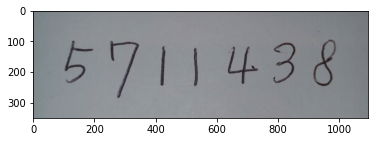

In [ ]:
plt.imshow(im) #OpenCV RGB倒轉

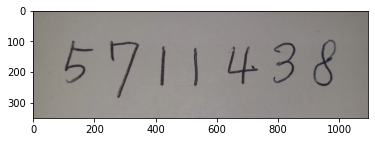

In [ ]:
plt.imshow(im[...,::-1]) #RGB正常狀態

In [ ]:
seu=cv2.imread('seulgi.jpg')

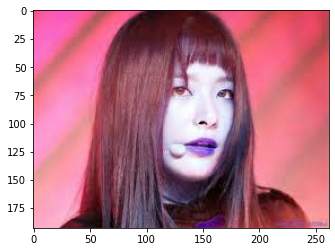

In [ ]:
plt.imshow(seu)

(-0.5, 261.5, 192.5, -0.5)

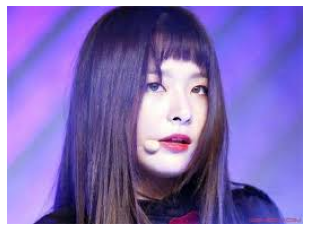

In [ ]:
plt.imshow(seu[...,::-1])
plt.axis(False)

In [ ]:
x=[1,2,3]

In [ ]:
x[::-1]

[3, 2, 1]

In [ ]:
# 使用 PIL 讀取圖片
pil_seu = Image.open('seulgi.jpg')

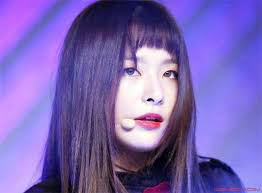

In [ ]:
pil_seu

## 將RGB圖片轉乘灰階圖(Gray Scale Image)

In [ ]:
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

In [ ]:
im.shape

(350, 1094, 3)

In [ ]:
gray.shape

(350, 1094)

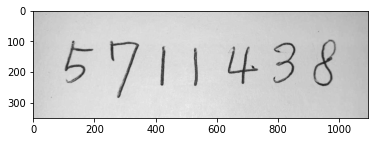

In [ ]:
plt.imshow(gray,cmap='gray') #cmap=灰階

In [ ]:
seu_gray=cv2.cvtColor(seu,cv2.COLOR_BGR2GRAY)

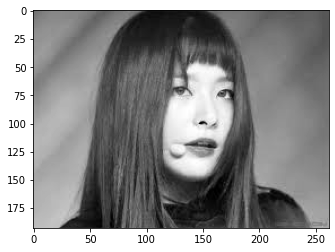

In [ ]:
plt.imshow(seu_gray,cmap='gray')

### 找出數字的contour(輪廓)

In [ ]:
ret, im1 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy  = cv2.findContours(im1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
im2 = cv2.drawContours(im, contours, -1, (0,255,75), 2)


im = cv2.imread('test2.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

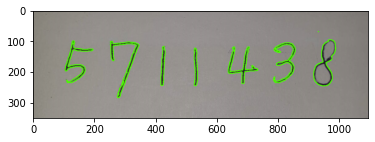

In [ ]:
plt.imshow(im[...,::-1])

### 取得數字的Bounding BOX(邊界框)

In [ ]:
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
    print(x,y,w,h)

109 227 5 4
703 136 1 1
704 132 1 2
526 123 12 123
637 119 98 120
416 117 16 128
785 106 72 130
252 101 95 184
104 99 93 137
916 96 73 151
931 69 2 2


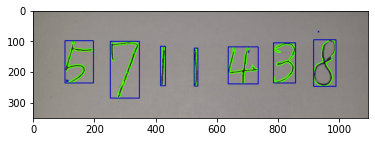

In [ ]:
plt.imshow(im[...,::-1])

In [ ]:
x,y,w,h=cv2.boundingRect(contours[4])

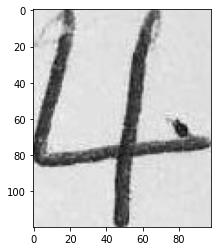

In [ ]:
plt.imshow(gray[y:y+h,x:x+w],cmap='gray')

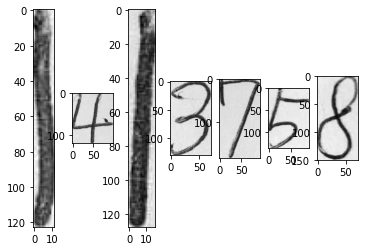

In [ ]:
c=1
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    #if abs(w-h)<10:
    if h<40:
      continue
    plt.subplot(1,7,c)
    plt.imshow(gray[y:y+h,x:x+w],cmap='gray')
    c=c+1

## 檢視一下sklearn的digits資料集

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
type(digits)

sklearn.utils.Bunch

In [ ]:
type(digits.data)

numpy.ndarray

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
digits.images[0].shape

(8, 8)

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

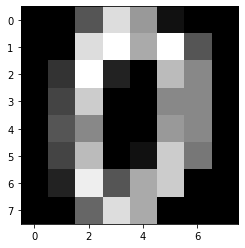

In [ ]:
# 0=黑色 <=> 15=白色
plt.imshow(digits.images[0],cmap='gray')

In [ ]:
digits.target[0]

0

## 建立手寫數字辨識的模型 SUpport Vector meching

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
# flatten the images
# n_samples = len(digits.images)
# data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [ ]:
clf.score(X_test,y_test)

0.9688542825361512

### 先取得排序後的Bounding Box

In [ ]:
boxes=[]
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if h<40:
      continue
    boxes.append((x,y,w,h))

In [ ]:
boxes.sort()

In [ ]:
boxes

[(104, 99, 93, 137),
 (252, 101, 95, 184),
 (416, 117, 16, 128),
 (526, 123, 12, 123),
 (637, 119, 98, 120),
 (785, 106, 72, 130),
 (916, 96, 73, 151)]

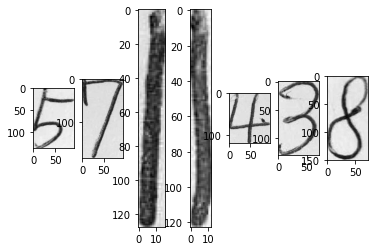

In [ ]:
c=1
for box in boxes:
  x,y,w,h=box
  plt.subplot(1,7,c)
  plt.imshow(gray[y:y+h,x:x+w],cmap='gray')
  c=c+1

### 調整影像 大小&強度

In [ ]:
# def get_digits(img,x,y,w,h):
#   return img[y:y+h,x:x+w]
  
def get_digits(x):
    returm img[boxes[x][1]:boxes[x][1]+boxes[x][3],boxes[x][0]:boxes[x][0]+boxes[x][2]]

SyntaxError: ignored

In [ ]:
boxes

[(104, 99, 93, 137),
 (252, 101, 95, 184),
 (416, 117, 16, 128),
 (526, 123, 12, 123),
 (637, 119, 98, 120),
 (785, 106, 72, 130),
 (916, 96, 73, 151)]

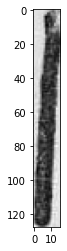

In [ ]:
# use * to umpack tuple 解包
plt.imshow(get_digits(gray,*boxes[2]),cmap='gray')

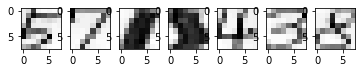

In [ ]:
fig=plt.figure()
c=len(boxes)
for n in range(c):
  test_img=cv2.resize(get_digits(gray,*boxes[n]),(8,8),interpolation=cv2.INTER_AREA) #把test1圖片x,y,w,h 轉成8*8大小 並用interpolation內差
  fig.add_subplot(1,c,n+1)
  plt.imshow(test_img,cmap='gray')

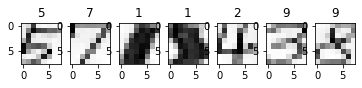

In [ ]:
fig=plt.figure()
c=len(boxes)
for n in range(c):
  test_img=cv2.resize(get_digits(gray,*boxes[n]),(8,8),interpolation=cv2.INTER_AREA) #把test1圖片x,y,w,h 轉成8*8大小 並用interpolation內差
  fig.add_subplot(1,c,n+1)
  plt.imshow(test_img,cmap='gray')
  test_img=((255-test_img)/255)*16 #黑白反向
  test_img=test_img.reshape(1,64) #向量轉成一維
  plt.title(clf.predict(test_img)[0]) #使用clf模型辨識test1

In [ ]:
fig = plt.figure()
c = len(boxes)
for n in range(c):
    h, w = get_digits(n).shape
    ratio = 8 / h
    nw = int(w * ratio+0.5)
    testimg = cv2.resize(get_digits(n), (nw, 8), interpolation = cv2.INTER_AREA)
    testimg = (255-testimg)/255*16
    p1 = (8-nw)//2
    p2 = 8-p1-nw
    p01 = np.zeros((8, p1))
    p02 = np.zeros((8, p2))
    testimg = np.hstack((p01, testimg, p02))
    fig.add_subplot(1, c, n+1)
    plt.imshow(testimg, cmap="gray_r")
    testimg = testimg.reshape(1, 64)
    plt.title(clf.predict(testimg)[0])

NameError: ignored

<Figure size 432x288 with 0 Axes>

#### 範例網站

https://github.com/victorgau/Python_ML_DL/blob/master/4-05%20%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98.ipynb
